# Lane Detection in Video 

In [ ]:
from pylab import rcParams
rcParams['figure.figsize']=(20,20)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
img_bgr=cv.imread('solidWhiteRight.jpg')

In [3]:
img_rgb=cv.cvtColor(img_bgr,cv.COLOR_BGR2RGB)

In [4]:
img_gray=cv.cvtColor(img_bgr,cv.COLOR_BGR2GRAY)

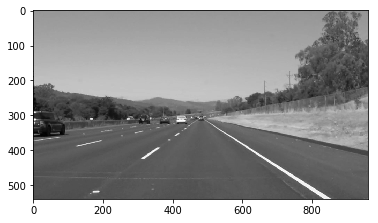

In [5]:
plt.imshow(img_gray,cmap='gray')

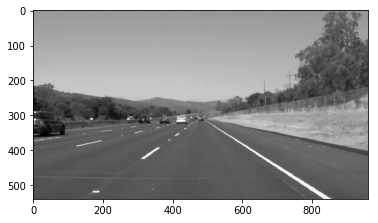

In [6]:
# We will Blur the imaage to remove noise
test_b=cv.GaussianBlur(img_gray,(5,5),0)
plt.imshow(test_b,cmap="gray")

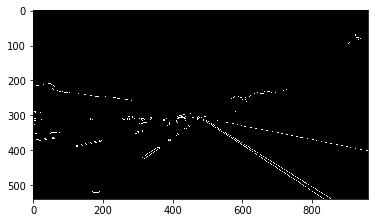

In [7]:
# Canny Edge detection for identiying sharp color changes
test_c=cv.Canny(test_b,120,225)
plt.imshow(test_c,cmap="gray")

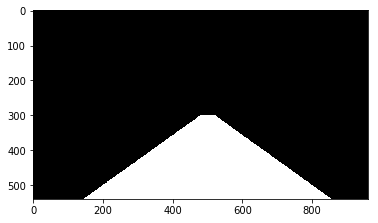

In [8]:
#generate a black mask
mask=np.zeros_like(test_c)    # Creating Black image 

p=np.array([(869,550),(520,300),(480,300),(130,550)])      #Creating Polygon

reg=cv.fillPoly(mask,[p],255)


plt.imshow(mask,cmap="gray")

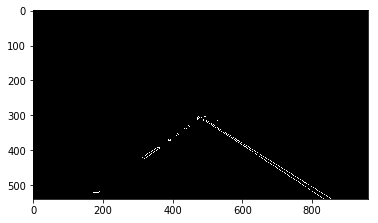

In [9]:
reg_b=cv.bitwise_and(test_c,reg)     # 1)White and White=White    2)White and Black=Black
plt.imshow(reg_b,cmap="gray")

In [10]:
lines=cv.HoughLinesP(
   reg_b,
   rho=6,
    theta=np.pi/60,
    threshold=160,
    minLineLength=40,
    lines=np.array([]),
    maxLineGap=5




)

In [11]:
lines

array([[[564, 357, 670, 425]],

       [[651, 420, 832, 538]],

       [[765, 484, 812, 512]],

       [[475, 304, 659, 424]],

       [[700, 442, 769, 486]],

       [[310, 423, 357, 392]],

       [[801, 506, 853, 539]],

       [[497, 319, 723, 466]]], dtype=int32)

In [12]:
lines.shape

(8, 1, 4)

In [13]:
lines.reshape(-1,4).shape

(8, 4)

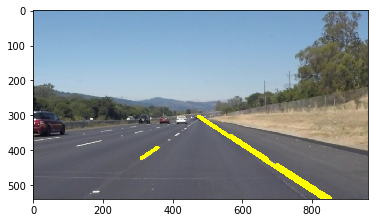

In [14]:
for line in lines.reshape(-1,4):
    x1,y1,x2,y2=line
    cv.line(img_rgb,(x1,y1),(x2,y2),(255,255,0),10)
plt.imshow(img_rgb)    

In [18]:
# Applying on Video
import cv2 as cv
import numpy as np
cam=cv.VideoCapture('solidWhiteRight.mp4')

counter=0
while True:
    
    
        
    try:
        s,frame=cam.read()
        img_gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        counter+=1
    except:
        cv.destroyAllWindows()
        break
    
    test_b=cv.GaussianBlur(img_gray,(5,5),0)
    test_c=cv.Canny(test_b,120,225)
    mask=np.zeros_like(test_c)

    p=np.array([(990,550),(520,300),(480,300),(130,550)])

    reg=cv.fillPoly(mask,[p],255)
    reg_b=cv.bitwise_and(test_c,reg)

    lines=cv.HoughLinesP(
    reg_b,
    rho=6,
    theta=np.pi/60,
    threshold=160,
    minLineLength=40,
    lines=np.array([]),
    maxLineGap=5
    )
    for line in lines.reshape(-1,4):    
        x1,y1,x2,y2=line
        m=(y2-y1)/(x2-x1)
        #print(m)
        if m<0:
            cv.line(frame,(x1,y1),(x2,y2),(255,0,0),10)
        else:
            cv.line(frame,(x1,y1),(x2,y2),(0,0,255),10)
            
        
        
    cv.imshow('frame',frame)

    
    key=cv.waitKey(1)
    if key==ord('q'):
        cv.destroyAllWindows()
        break
cam.release() 
    
        
  